In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
import os
import sys
import cv2
import math
from PIL import Image
import numpy as np
from skimage import io, color
import zipfile
import imghdr
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.image as mpimg
%pylab inline
import csv
import cv2
from termcolor import colored
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'sum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [282]:
# with open('/content/drive/MyDrive/Minor II/PCA/output_pca.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["FileName", "Original size (in bytes)", "Compressed size (in bytes)", "Compression Ratio (CR)", "PSNR"])

In [283]:
try:
    image_path = '/content/drive/MyDrive/Minor II/Flower/flower_images/flower_images/0014.png'
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

In [284]:
file_name = os.path.basename(image_path)

out_name=os.path.splitext(file_name)[0]
out_name = out_name + "_pca_compressed.png"

In [285]:
rgba_image = Image.open(image_path)
rgb_image = rgba_image.convert('RGB')
image=np.asarray(rgb_image)/255
w,h,d=image.shape
print(w," ",h," ",d)

128   128   3


In [286]:
or_im=image.reshape(w*h*d)/255
or_im.shape

(49152,)

In [287]:
ori_img = rgb_image
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(128, 128, 3)

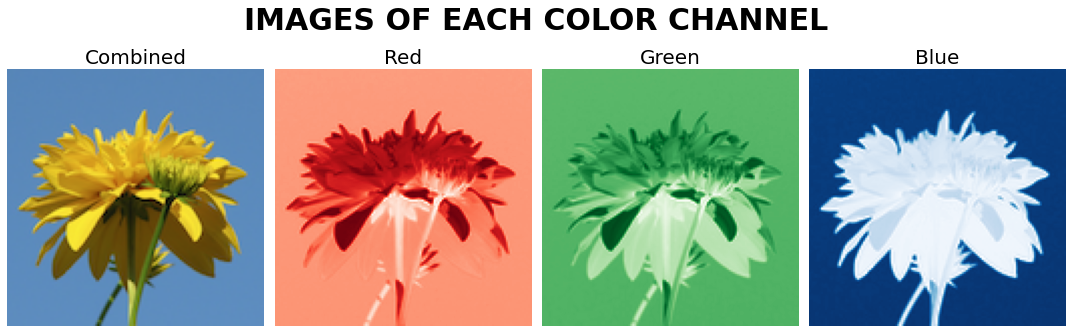

In [288]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
cmap_list = ["Reds", "Greens", "Blues"]

axes[0].imshow(ori_pixels)
axes[0].axis("off")
axes[0].set_title("Combined", size = 20)

for idx, ax, px in zip(range(3), axes[1:], ori_pixels.T):
    ax.imshow(px.T, cmap = cmap_list[idx])
    ax.axis("off")
    ax.set_title(cmap_list[idx][:-1], size = 20)
    
plt.tight_layout()
fig.suptitle("IMAGES OF EACH COLOR CHANNEL", size = 30, y = 1.03, fontweight = "bold")
plt.show()

In [289]:
res = []
X_t = np.transpose(X)
for channel in range(3):
    # SEPARATE EACH RGB CHANNEL
    pixel = X_t[channel].reshape(*ori_pixels.shape[:2])
    
    # PCA
    pca = PCA(random_state = 123)
    pixel_pca = pca.fit_transform(pixel)
    
    pca_dict = {
        "Projection": pixel_pca,
        "Components": pca.components_,
        "Mean": pca.mean_
    }
    res.append(pca_dict)

In [290]:

for n in range(1, 20):
    # SELECT N-COMPONENTS FROM PC
    temp_res = []
    for channel in range(3):
        pca_channel = res[channel]
        pca_pixel = pca_channel["Projection"][:, :n]
        pca_comp = pca_channel["Components"][:n, :]
        pca_mean = pca_channel["Mean"]
        compressed_pixel = np.dot(pca_pixel, pca_comp) + pca_mean
        temp_res.append(compressed_pixel.T)
    compressed = np.transpose(temp_res)

In [291]:
img_file1 = BytesIO()
im1 = Image.fromarray(np.uint8(rgb_image))
im1.save(img_file1, 'png')
ori_size = img_file1.tell()
ori_size

25399

In [292]:
im1.save('out.png')

In [293]:
img_file = BytesIO()
im = Image.fromarray(np.uint8(compressed))
im.save(img_file, 'png')
compressed_size = img_file.tell()
compressed_size

27153

In [294]:
oi=image_path
ci='out.png'

In [295]:
compression_ratio=ori_size/compressed_size
compression_ratio

0.9354030862151512

In [296]:
comp_im=compressed.reshape(w*h*d)/255
#ci=comp_im

In [297]:
sum=0
for i in range(0,or_im.size):
  sum=sum+((or_im[i]-comp_im[i])**2)

mse = sum/(w*h*d)*255*255

In [298]:
psnr = 10*(math.log10((255*255)/mse))
psnr

5.44501749964936

In [299]:
compression_ratio=ori_size/compressed_size
compression_ratio

0.9354030862151512

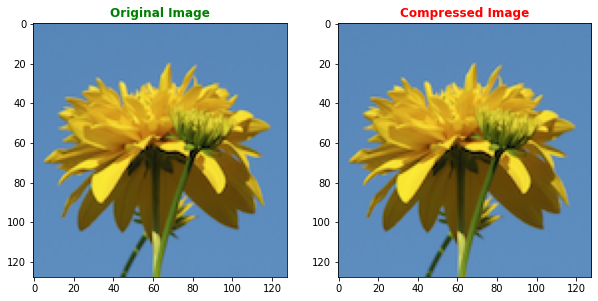

Original Size:  25399 
Compressed Size:  27153 

Compression Ratio:  0.9354030862151512 
PSNR:  5.44501749964936


In [300]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

print("Original Size: ", ori_size, "\nCompressed Size: ", compressed_size, "\n\nCompression Ratio: ", compression_ratio, "\nPSNR: ", psnr)

In [301]:
img = cv2.imread('out.png', 1)
path = '/content/drive/MyDrive/Minor II/PCA/Compressed_PCA'
cv2.imwrite(os.path.join(path , out_name), img)

True

In [302]:
with open('/content/drive/MyDrive/Minor II/PCA/output_pca.csv', 'a+', newline='') as file:
  writer = csv.writer(file)
  writer.writerow([file_name, ori_size, compressed_size, compression_ratio, psnr])

In [303]:
# reading compressed output data file  
pd.read_csv("/content/drive/MyDrive/Minor II/PCA/output_pca.csv")

,FileName,Original size (in bytes),Compressed size (in bytes),Compression Ratio (CR),PSNR
0,0001.png,33169,30904,1.073291,7.471542
1,0002.png,33208,31765,1.045427,5.364303
2,0003.png,28950,27465,1.054069,7.856755
3,0004.png,32985,30407,1.084783,4.775872
4,0005.png,31103,29151,1.066962,5.223359
5,0006.png,31925,32052,0.996038,5.879740
6,0009.png,35132,32429,1.083351,6.535508
7,0011.png,28761,27408,1.049365,6.738565
8,0012.png,31783,29924,1.062124,6.833711
9,0013.png,30484,28727,1.061162,5.527391
